# $$\color{red}{\text{Machine Learning}}$$

$$\color{orange}{\text{Decision Tree}}$$

$$\color{lime}{\text{Alireza Javid - 810198375}}$$

## $\color{deepskyblue}{\text{Import Libraries}}$

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import seaborn as sns

## $\color{deepskyblue}{\text{Preprocessing}}$

In [342]:
df = pd.read_csv("Diabetes.csv")
df.head()

,pregnant,glucose,BP,skin,insulin,BMI,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [343]:
df.describe()

,pregnant,glucose,BP,skin,insulin,BMI,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   BP        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   BMI       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [345]:
df.isna().sum()

pregnant    0
glucose     0
BP          0
skin        0
insulin     0
BMI         0
pedigree    0
age         0
label       0
dtype: int64

In [346]:
X = df.drop(["label"],axis=1)
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42, test_size=0.30)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [347]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

## $\color{deepskyblue}{\text{Unpruned Decision Tree}}$

In [348]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)


print("Accuracy on training data:", train_accuracy)
print("Accuracy on test data:", test_accuracy)

Accuracy on training data: 1.0
Accuracy on test data: 0.7012987012987013


### $\color{deepskyblue}{\text{Display Result}}$

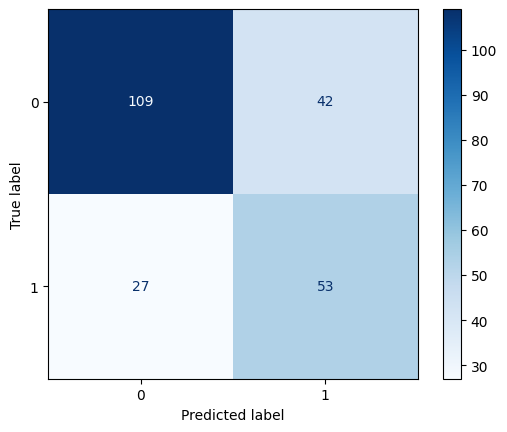

In [349]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues);

In [350]:
cm_train = confusion_matrix(y_train, y_train_pred)

cr_train = classification_report(y_train, y_train_pred)

cm_test = confusion_matrix(y_test, y_test_pred)

cr_test = classification_report(y_test, y_test_pred)

print("Classification Report (Training Data):\n", cr_train)

print("Classification Report (Test Data):\n", cr_test)

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       188

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231



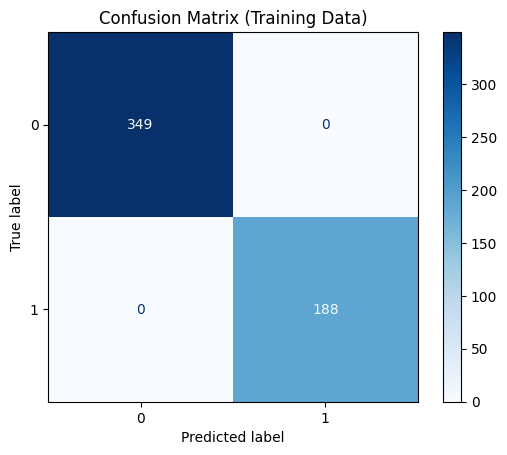

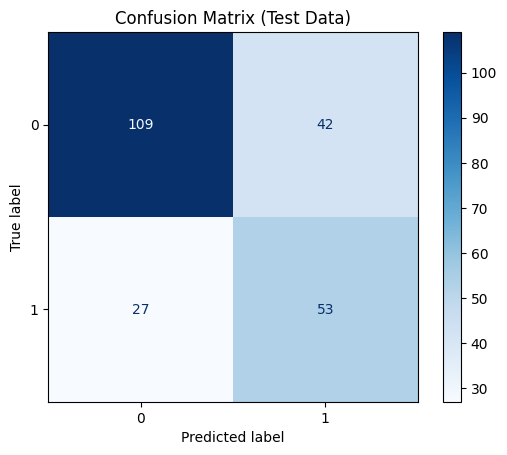

In [351]:
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=clf.classes_)
disp_train.plot(cmap='Blues')
plt.title('Confusion Matrix (Training Data)')
plt.show()

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp_test.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Data)')
plt.show()


### $\color{deepskyblue}{\text{Plot Decision Tree}}$

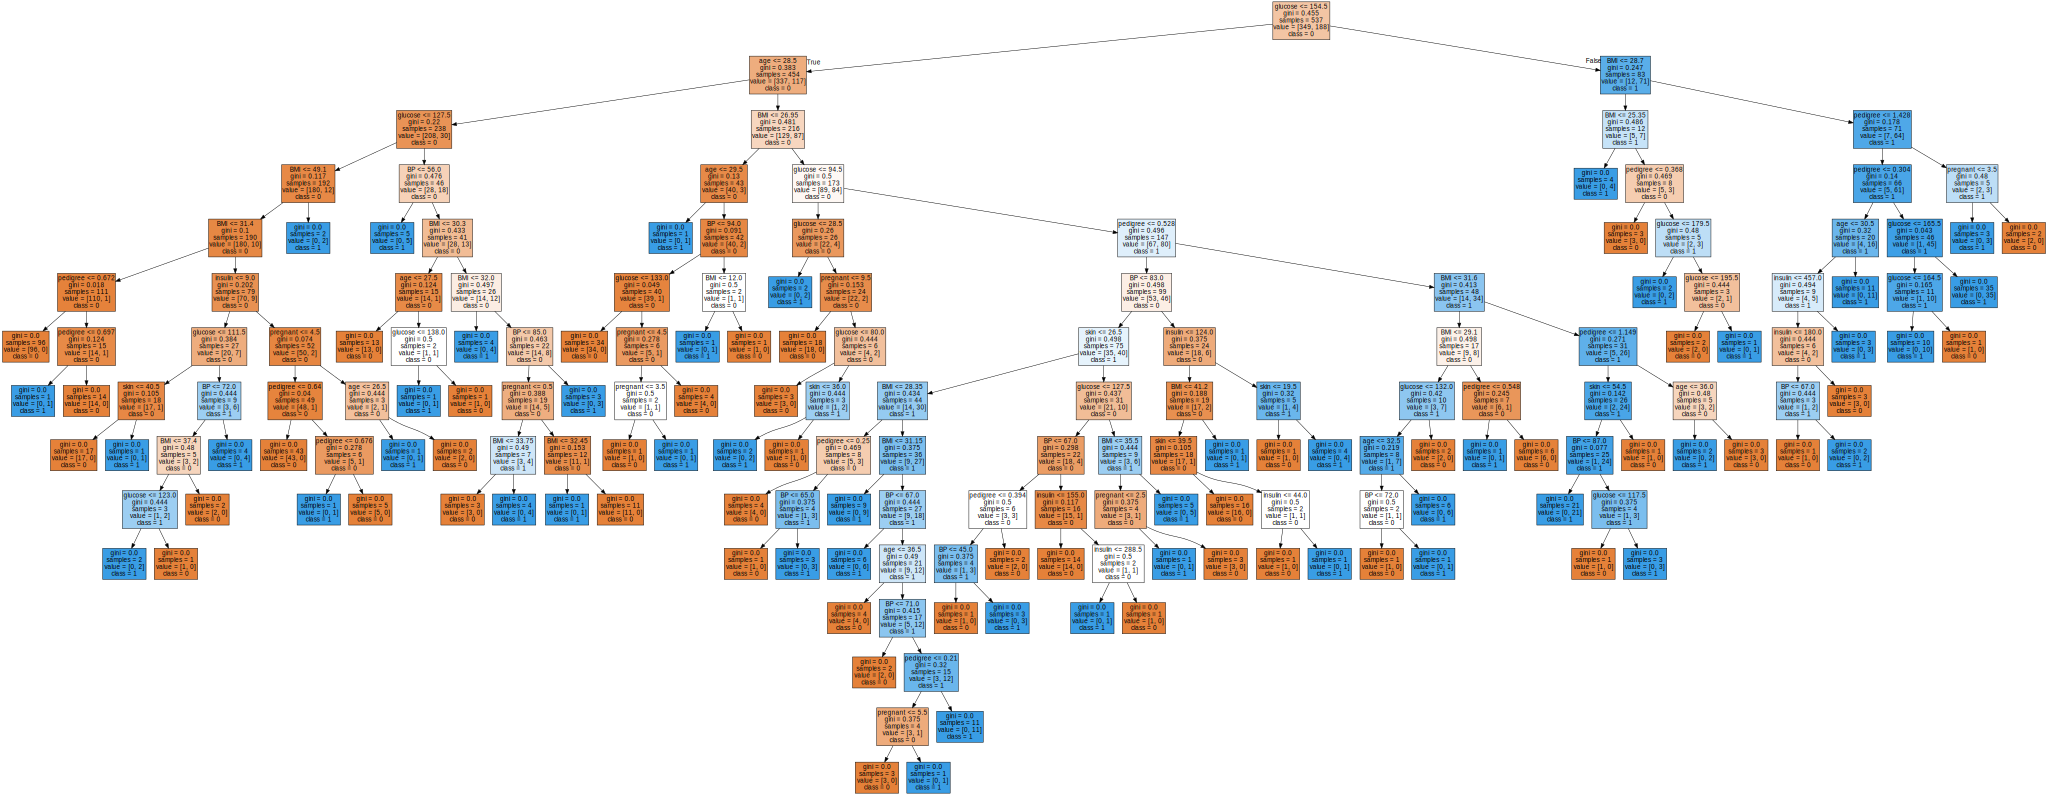

In [352]:
import graphviz

dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
# Save output image
output_file = "decision_tree1"
graph.render(filename=output_file, cleanup=True)
graph

## $\color{deepskyblue}{\text{Pruned Decision Tree}}$
In this part, the maximum depth of tree is 2.

In [353]:
clf2 = DecisionTreeClassifier(max_depth = 2)

clf2.fit(X_train, y_train)

y_train_pred = clf2.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = clf2.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)


print("Accuracy on training data:", train_accuracy)
print("Accuracy on test data:", test_accuracy)

Accuracy on training data: 0.7597765363128491
Accuracy on test data: 0.7186147186147186


### $\color{deepskyblue}{\text{Display Result}}$

In [354]:
cm_train = confusion_matrix(y_train, y_train_pred)

cr_train = classification_report(y_train, y_train_pred)

cm_test = confusion_matrix(y_test, y_test_pred)

cr_test = classification_report(y_test, y_test_pred)

print("Classification Report (Training Data):\n", cr_train)

print("Classification Report (Test Data):\n", cr_test)

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.74      0.97      0.84       349
           1       0.86      0.38      0.52       188

    accuracy                           0.76       537
   macro avg       0.80      0.67      0.68       537
weighted avg       0.78      0.76      0.73       537

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.72      0.92      0.81       151
           1       0.69      0.34      0.45        80

    accuracy                           0.72       231
   macro avg       0.71      0.63      0.63       231
weighted avg       0.71      0.72      0.69       231



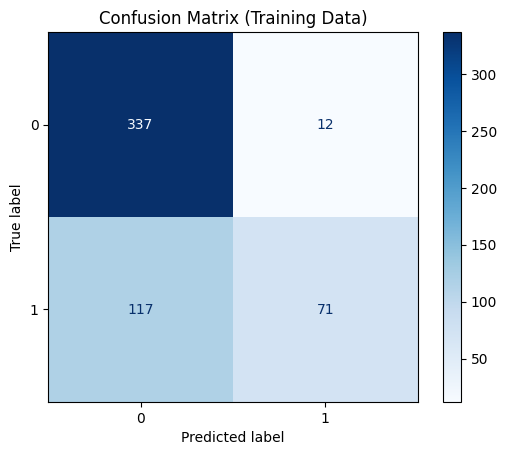

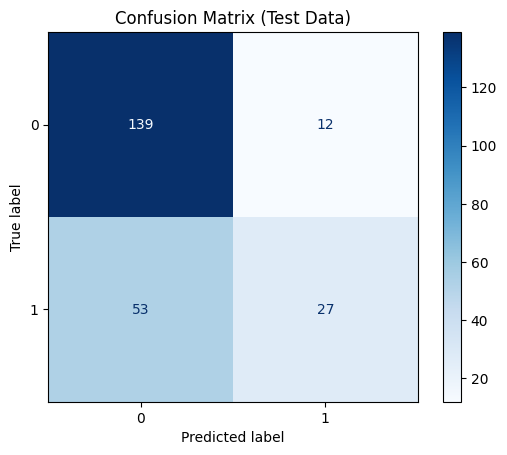

In [355]:
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=clf2.classes_)
disp_train.plot(cmap='Blues')
plt.title('Confusion Matrix (Training Data)')
plt.show()

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf2.classes_)
disp_test.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Data)')
plt.show()


### $\color{deepskyblue}{\text{Plot Decision Tree}}$

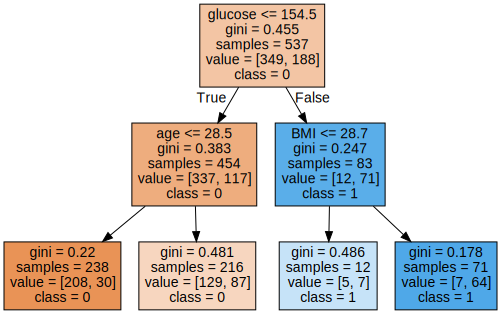

In [357]:
dot_data = sklearn.tree.export_graphviz(clf2, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
# Save output image
output_file = "decision_tree2"
graph.render(filename=output_file, cleanup=True)
graph